In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Define the CNN model as per the assignment instructions
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # Convolutional input layer, 32 feature maps, 3x3, ReLU activation
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))

    # Additional convolutional and max pooling layers
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))

    # Final softmax output layer for classification
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model using Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Fix random seed for reproducibility
np.random.seed(7)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Build the model
model = build_cnn_model(input_shape=(32, 32, 3), num_classes=num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

# Save the trained model
model.save('cnn_model.h5')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 372s 472ms/step - accuracy: 0.2830 - loss: 1.9142 - val_accuracy: 0.5136 - val_loss: 1.3449
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 473ms/step - accuracy: 0.5365 - loss: 1.2754 - val_accuracy: 0.6088 - val_loss: 1.0915
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 385s 478ms/step - accuracy: 0.6297 - loss: 1.0353 - val_accuracy: 0.6648 - val_loss: 0.9399
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 373s 466ms/step - accuracy: 0.6823 - loss: 0.8945 - val_accuracy: 0.6956 - val_loss: 0.8778
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 377s 460ms/step - accuracy: 0.7136 - loss: 0.8056 - val_accuracy: 0.6974 - val_loss: 0.8738
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 361s 461ms/step - accuracy: 0.7363 - loss: 0.7399 - val_accuracy: 0.7351 - val_loss: 0.7641
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 387s 467ms/step - accuracy: 0.7543 - loss: 0.6840 - val_accuracy: 0.7427 - val_loss: 0.7356
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 467ms/step - accuracy: 0.7770 -

In [3]:
 import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='absl')

from keras.models import load_model

# Load the trained model
model = load_model('cnn_model.h5')

# Recompile the model with metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

# Compare predictions with actual labels
for i in range(4):
    print(f"Image {i+1} - Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")

Test Accuracy: 79.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Image 1 - Predicted: 5, Actual: 3
Image 2 - Predicted: 8, Actual: 8
Image 3 - Predicted: 8, Actual: 8
Image 4 - Predicted: 0, Actual: 0


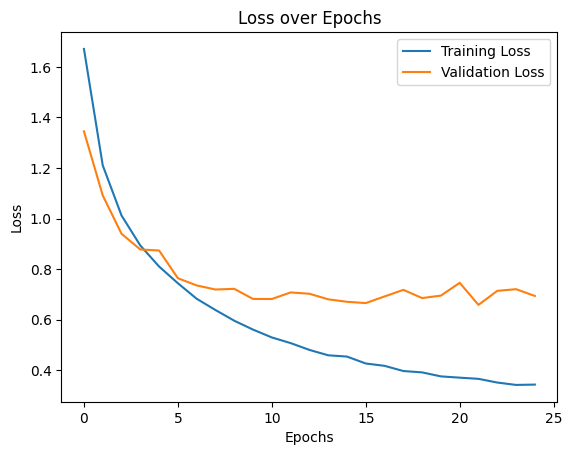

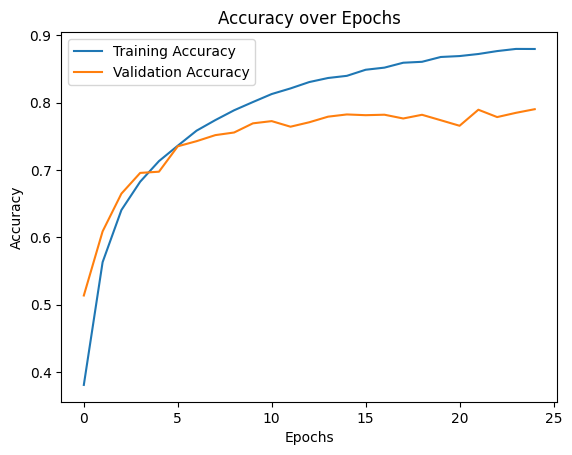

In [4]:
import matplotlib.pyplot as plt
import pickle

# Load the training history
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
ICP5 VIDEP LINK https://drive.google.com/file/d/1Kac7A_dFsdn39nhNsWNdOVcRMQp3SROm/view?usp=sharing